# MA332 Homework 2
Ben Raivel

In [1]:
from numpy import abs, sqrt, linspace, pi, sin, nan, min, max, unique, empty, exp
import matplotlib
import matplotlib.pyplot as plt

## Algorithms

### Fixed Point Iteration (FPI):

In [2]:
def fpi(f, x, iter=1000, tol=1e-2):
    ''' Finds the fixed point x* = f(x*) of function f starting at x using fixed point iteration'''
    x_n = []  # list to hold guesses

    for n in range(iter):
        x_n.append(x)

        if abs(f(x) - x) < tol:  # check stopping condition
            return x_n
      
        elif x > 1e10:  # other stopping condition
            return x_n

        x = f(x)  # update approximation
    return x_n

### Bisection Method:

In [3]:
def bisection(f, a, b, iter=100, tol=1e-2):
    ''' Finds the root of function f on [a,b] using the bisection method'''

    if f(a)*f(b) > 0: raise 'No root on [a, b]'

    x_n = []  # list to hold guesses

    for n in range(iter):

        mid = (a + b)/2  # compute approximate root (midpoint)
        x_n.append(mid)

        if abs(f(mid)) < tol: return x_n  # check stopping condition

        elif f(a)*f(mid) > 0: a = mid  # check which bound to update

        else: b = mid
    return x_n

### Newton's Method:

In [4]:
def newton(f, df, x, iter=1000, tol=1e-2):
    ''' Finds the root of function f with derivative df using Newton's method starting at x'''
    
    x_n = []  # list to hold guesses
    
    for i in range(iter):
        x_n.append(x)
        
        if abs(f(x)) < tol: return x_n  # check stopping condition

        x = x - f(x)/df(x)  # update approximation
    return x_n

## Problem 1

Starting with:
$$ x^3 + x - 2 = 0 $$

Add $ cx $ to both sides:
$$ x^3 + x - 2 + cx = cx $$

Divide the equation by $ c $ to get a function $ g(x) $ with fixed point $ g(1) = 1 $:
$$ g(x) = \frac{1}{c}x^3 + \frac{c+1}{c}x - \frac{2}{c} = x $$

For fixed point problem $ g(p) = p $, fixed point iteration will converge linearly with rate $ s $, **if** $ s $ satisfies:
$$ s \equiv | g^\prime(p) | < 1 $$ 

Compute the derivative of $ g $:
$$ g^\prime(x) = \frac{3}{c}x^2 + \frac{c+1}{c} $$

Which gives $ s $:
$$ s = | g^\prime(1) | = | \frac{3}{c} + \frac{c+1}{c} | = | 1 + \frac{4}{c} | $$

To satisfy $ | 1 + \frac{4}{c} | < 1 $

Error on the $ (n + 1)^{\text{th}} $ iteration is related to $ s $ by:
$$ E_{n + 1} \approx sE_n  $$

## Problem 2

## Problem 3

First define $ f(x) = x^2 - 2 $ and $ \frac{df(x)}{dx} $:

In [5]:
def f(x): return x**2 - 2
def df(x): return 2*x

Create an array of test x values around the root $ f(\sqrt{2})=0 $ to compare the convergence of the bisection method and Newton's method

In [6]:
sqrt_2 = sqrt(2)
test_x = linspace(sqrt_2 + 0.1, sqrt_2 + 10, 1000)

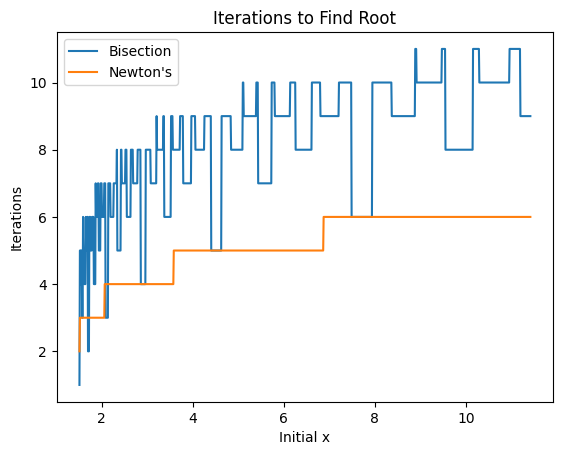

In [7]:
bisection_iter = []
newtons_iter = []

for i in range(1000):
    bisection_iter.append(len(bisection(f, sqrt_2-0.1, test_x[i])))
    newtons_iter.append(len(newton(f, df, test_x[i])))

plt.plot(test_x, bisection_iter, label='Bisection')
plt.plot(test_x, newtons_iter, label="Newton's")
plt.legend()
plt.title('Iterations to Find Root')
plt.xlabel('Initial x')
plt.ylabel('Iterations')
plt.show()

## Problem 4

### (a)
By the Fixed Point Theorem, $ g(x) $ will have a unique fixed point $ p \in [a, b]$ if:
- $ g \in C[a, b] $
- $ g(x) \in [a, b] $
- There exists a $ k $ such that $ 0 < k < 1 $ and $ | g^\prime(x) | \le k $ on $ [a, b] $

$ g(x) $ satisfies the first two conditions, to check the third find $ \frac{dg(x)}{dx} $:
$$ \frac{dg(x)}{dx} = \frac{1}{8} \sin(\frac{x}{2}) $$

Clearly one can choose $ k $ such that the third condition is satisfied, therefore $ g(x) $ must have a unique fixed point on $ [a, b] $

### (b)
Define $ g(x) = \pi + \frac{1}{2}\sin(\frac{x}{2}) $

In [8]:
def g(x): return pi + sin(x/2)/2

Find the fixed point on $ [0, 2\pi] $

In [9]:
approx = fpi(g, 1)
print(approx[-1])

3.626269950250724


### (c)
Using the corollary, write:
$$ E_n = |x_n - x| \le k^n \text{max}\{x_0 - a, b - x_0\} $$
$$ E_n = 0.01 \le 0.13^n (2\pi - 1) $$

Which gives:
$$ \frac{0.01}{(2\pi - 1)} \le 0.13^n $$
$$ \frac{\ln \left( \frac{0.01}{2\pi - 1} \right)}{\ln(0.13)} \le n $$
$$ n \ge 3.073 $$

Compare to the number of steps taken by the algorithm:

In [10]:
print(len(approx))

4


## Problem 5

### (a)
To find the maximum of $ c(t) $, find where $ \frac{dc(t)}{dt} = 0 $ using Newton's method. This requires computing the first and second derivative of $ c(t) $:
$$ c(t) = Ate^{-t/3} $$
$$ \frac{dc(t)}{dt} = -\frac{A(t-3)}{3}e^{-t/3} $$
$$ \frac{d^2c(t)}{dt^2} = \frac{A(t-6)}{3}e^{-t/3} $$

Define $ c(t) $, $ \frac{dc(t)}{dt} $, and $ \frac{d^2c(t)}{dt^2} $:

In [11]:
def c(t, A): return A*t*exp(-t/3)
def dc(t): return -(t-3)*exp(-t/3)/3
def d2c(t): return (t-6)*exp(-t/3)/9

Find where $ \frac{dc(t)}{dt} = 0 $ using Newton's method:

In [12]:
print('c(t) = 0 at t = ' + str(round(newton(dc, d2c, 1)[-1], 2)))

c(t) = 0 at t = 2.99


Evaluate $ c(t) $ at $ t_{\text{max}} $:

In [13]:
print(round(c(3, 1), 4))

1.1036


For $ A=1 $, $ c(3) = 1.1036 $. So to make $ c(3) = 1 $, let $ A = \frac{1}{1.1036} $

### (b)

To find when $ c(t) = 0.25 $, rewrite the equation as a root finding problem:
$$ f(t) = c(t) - 0.25 = 0 $$

Define $ f(t) $ and $ \frac{df(t)}{dt} $:

In [14]:
def f(t): return (1/1.1036)*t*exp(-t/3) - 0.25
def df(t): return -(1/1.1036)*(t-3)*exp(-t/3)/3

Using Newton's method, find the root of $ f(t) $:

In [15]:
root = round(newton(f, df, 1)[-1], 2)
print('f(t) = 0 at t = ' + str(root))
print('c(' + str(root) + ') = ' + str(c(root, 1/1.1036)))

f(t) = 0 at t = 0.31
c(0.31) = 0.2533219984839756


## Problem 6
First define $ g(x) $ and $ \frac{dg(x)}{dx} $:

In [16]:
def g(x): return (x - 1)*(x + 3)

def dg(x): return (x - 1) + (x + 3)

Create an array of x samples to use as starting points for Newton's Method:

In [17]:
x = linspace(-4, 2, 100)
y = g(x)

Find roots starting at each point:

In [18]:
roots  = []
for i in range(100):
    approx = newton(g, dg, x[i])
    roots.append(round(approx[-1], 2))

# copy of roots array with first and last values removed
trimmed = empty(98)
trimmed = roots[1:-1]

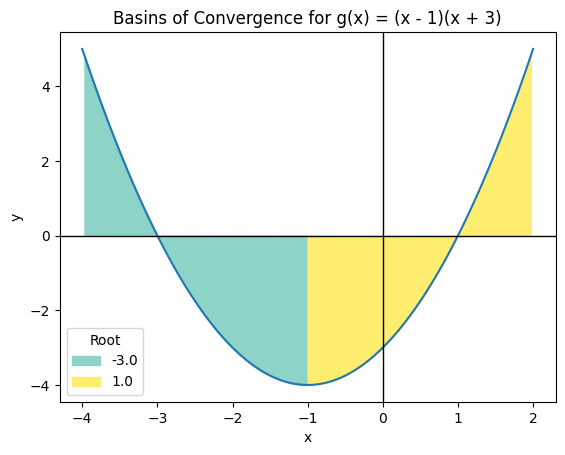

In [19]:
cmap=matplotlib.colormaps['Set3']
colors = cmap(roots)

# find the first x value that led to each root
_, root_indices = unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1

fig, axes = plt.subplots()
axes.plot(x, y)

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=1)
axes.axhline(color='Black', lw=1)

axes.set_title('Basins of Convergence for g(x) = (x - 1)(x + 3)')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend(title='Root')
plt.show()